In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
plt.rc('font', family='AppleGothic')
plt.rcParams["font.size"] = 12.
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [10]:
CHART_NAME = 'Heatmap_sns'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = 'welfareClean.csv'

In [11]:
# 파일 저장

def FileSave():
    global cnt
    cnt +=1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi = 400)
    print(savefile + '파일이 저장되었습니다.')

# 히트맵 - 2차원 데이터

# 결혼 유무와 성별에 따른 히트맵

pivot_table을 이용한 시각화
결혼 유무         결혼        무응답        이혼
성별                                   
남성     60.806978  44.629973  59.57767
여성     59.890179  54.913251  58.28169
Heatmap_sns_01.png파일이 저장되었습니다.


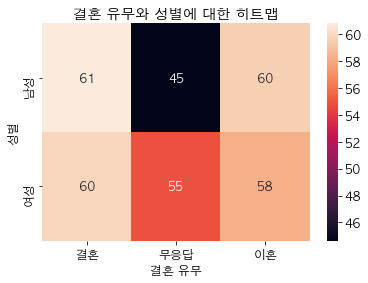

In [12]:
# data load
welfare = pd.read_csv(filename, encoding = 'CP949')

pivot = welfare.pivot_table(index = '성별', columns = '결혼 유무', values = '나이')
print('pivot_table을 이용한 시각화')
print(pivot)

## 1) pivot table을 이용한 시각화
# index : Y축, columns : X축
fig1 = plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data=pivot, annot=True)

# plt.show()
FileSave()

# 상관계수를 이용한 히트맵

상관 관계 시각화
             생일     직업 코드        소득        나이
생일     1.000000 -0.287829  0.093783 -1.000000
직업 코드 -0.287829  1.000000 -0.287414  0.287829
소득     0.093783 -0.287414  1.000000 -0.093783
나이    -1.000000  0.287829 -0.093783  1.000000

Heatmap_sns_02.png파일이 저장되었습니다.


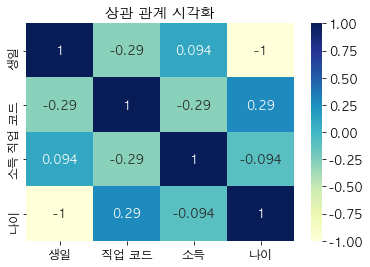

In [13]:
# 상관계수 구하기
# data load
welfare = pd.read_csv(filename, encoding = 'CP949')

cor = welfare.corr()
print('상관 관계 시각화')
print(cor); print("")

fig2 = plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data = cor, annot=True, cmap ='YlGnBu')

# plt.show()
FileSave()

In [15]:
from matplotlib.backends.backend_pdf import PdfPages

pdfsave = PdfPages(CHART_NAME + "_19011773.pdf")
pdfsave.savefig(fig1)
pdfsave.savefig(fig2)
pdfsave.close()